# Exercise 5 - Self Organizing Maps
#### Aim:
To implement Self-Organizing Map  using Python.
#### Program:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
class SOM :
    def __init__(self,n_inputs,n_neurons,l_rate=.01,n_epochs=100,random_state=None):
        self.random_state=random_state
        self.n_inputs = n_inputs    
        self.n_neurons = n_neurons
        self.l_rate = l_rate
        self.n_epochs = n_epochs
        
    def winner(self, X):
        # X is converted to two dimension to enable batch prediction
        if X.ndim==1:
            X = X[np.newaxis,:]
            
        # index of the Neuron with minimal euclidean distance is thw winner
        return np.argmin(
            np.sum(np.square(X[:,np.newaxis,:]-self.W),axis=-1),axis=-1
        )
        
    def update_weights(self, x , i_win):
        # stochastic weight updates (considering one input sample at a time)
        self.W[i_win] += self.l_rate*(x -self.W[i_win])
        return self.W
    
    def fit(self,X):
        # initialize weights by selecting random points from input sample
        if self.random_state is not None:
            np.random.seed(self.random_state)
        rnd_idx = np.random.choice(X.shape[0],self.n_neurons)
        self.W = X[rnd_idx]
        
        for i in range(self.n_epochs):
            for x in X:
                # Competitive process
                i_win = self.winner(x)
                # Adaptive process
                self.update_weights(x,i_win)
    
    def predict(self,X):
        return self.winner(X)

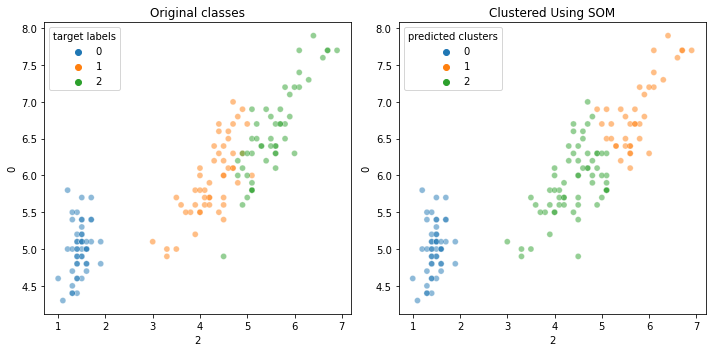

In [4]:
data = load_iris()

X = data["data"]
y = data["target"]
som = SOM(4,3,.01,20,random_state=0)
som.fit(X)
y_pred = som.predict(X)

pred_df = pd.DataFrame(X)
pred_df["target labels"] = pd.Categorical(y)
pred_df["predicted clusters"] = pd.Categorical(y_pred)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Original classes")
sns.scatterplot(data=pred_df,x=2,y=0,hue='target labels',alpha=.5)
plt.subplot(122)
plt.title("Clustered Using SOM")
sns.scatterplot(data=pred_df,x=2,y=0,hue='predicted clusters',alpha=.5)
plt.tight_layout()